<a href="https://colab.research.google.com/github/amir3x0/LLM-mini_projects/blob/main/Chat_with_Documents_Using_Hugging_Face_Open_source_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

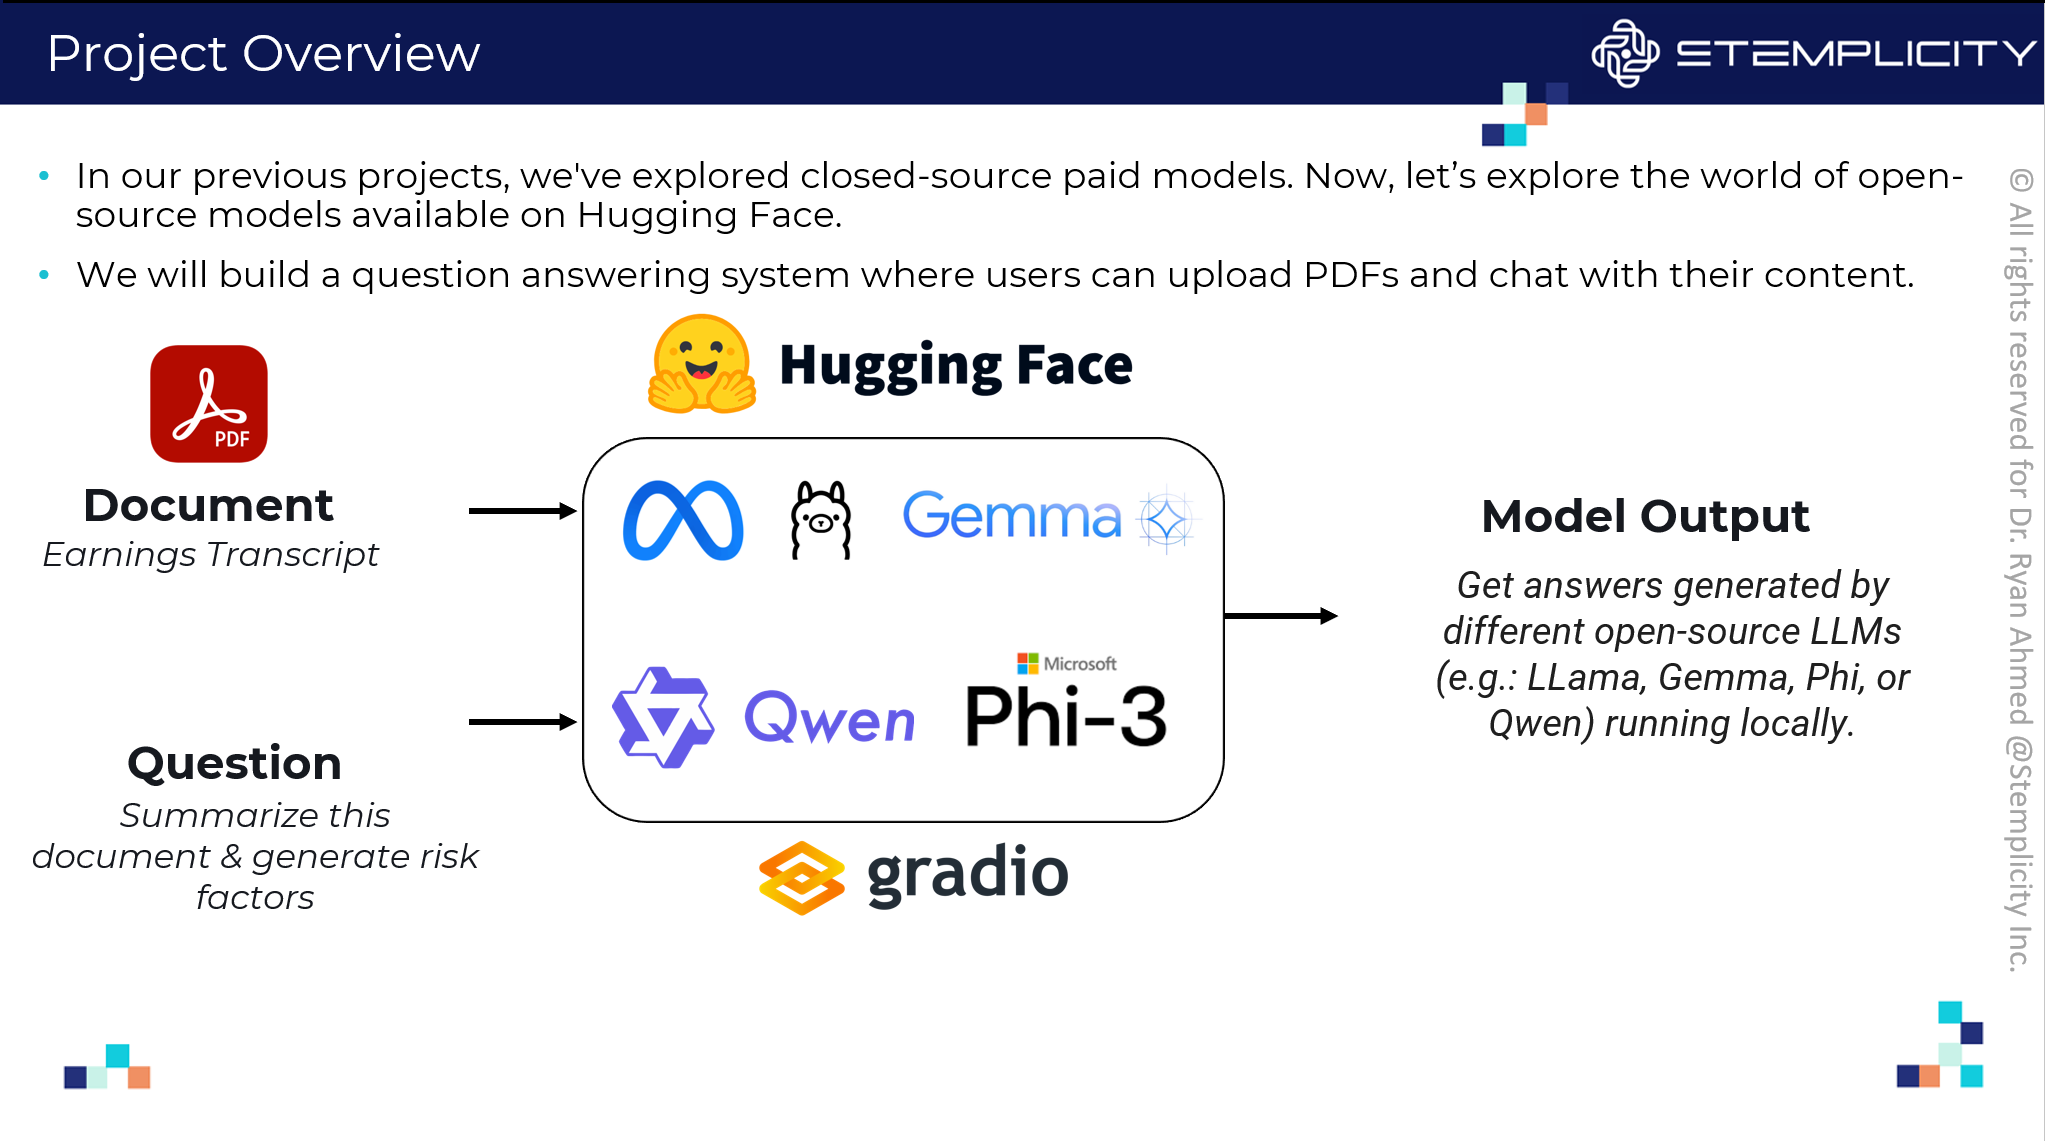

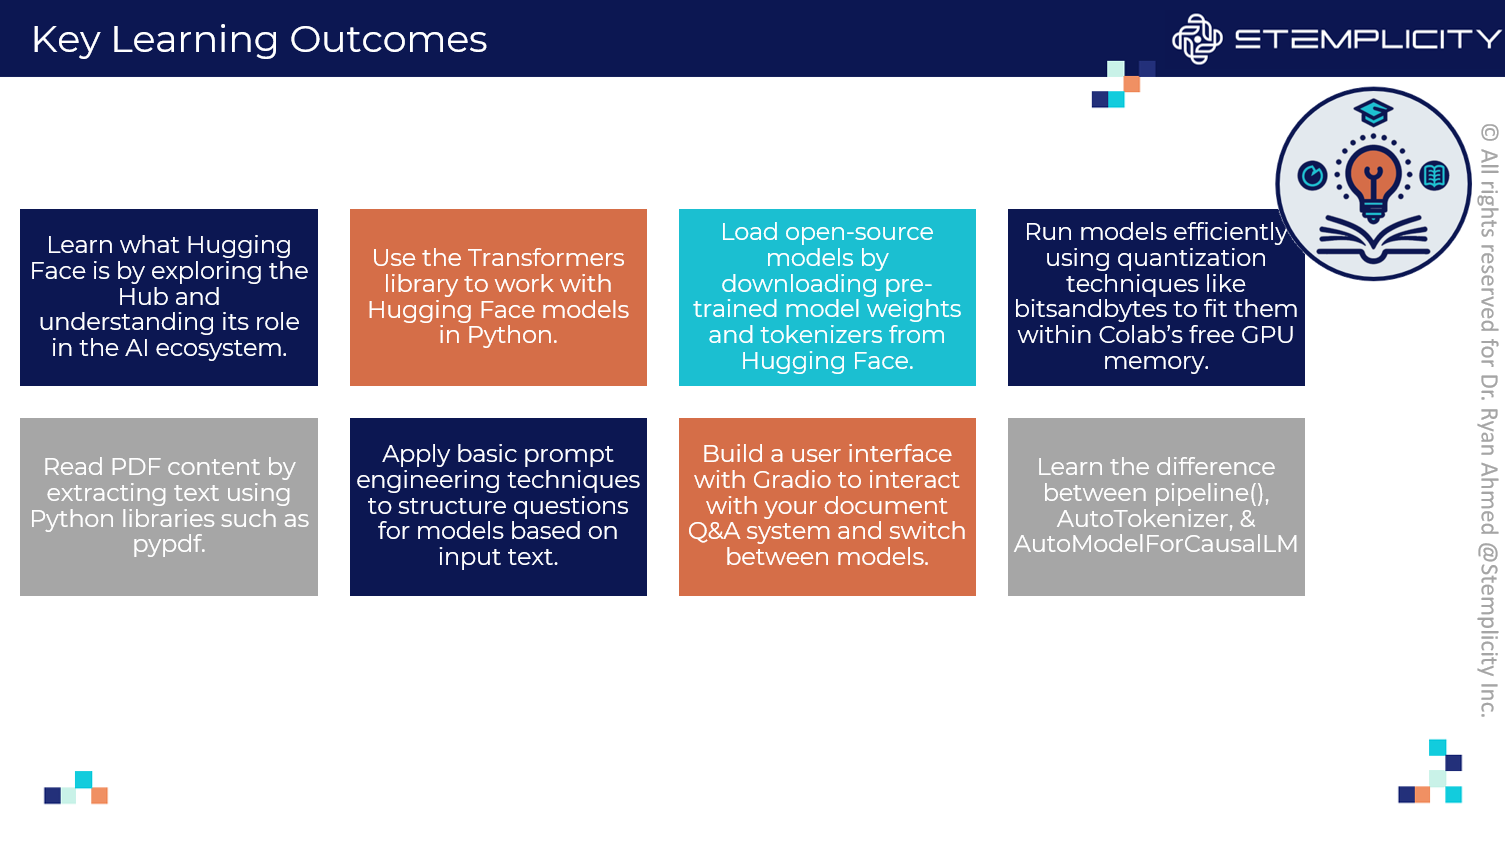

# TASK 2. EXPLORE HUGGING FACE!

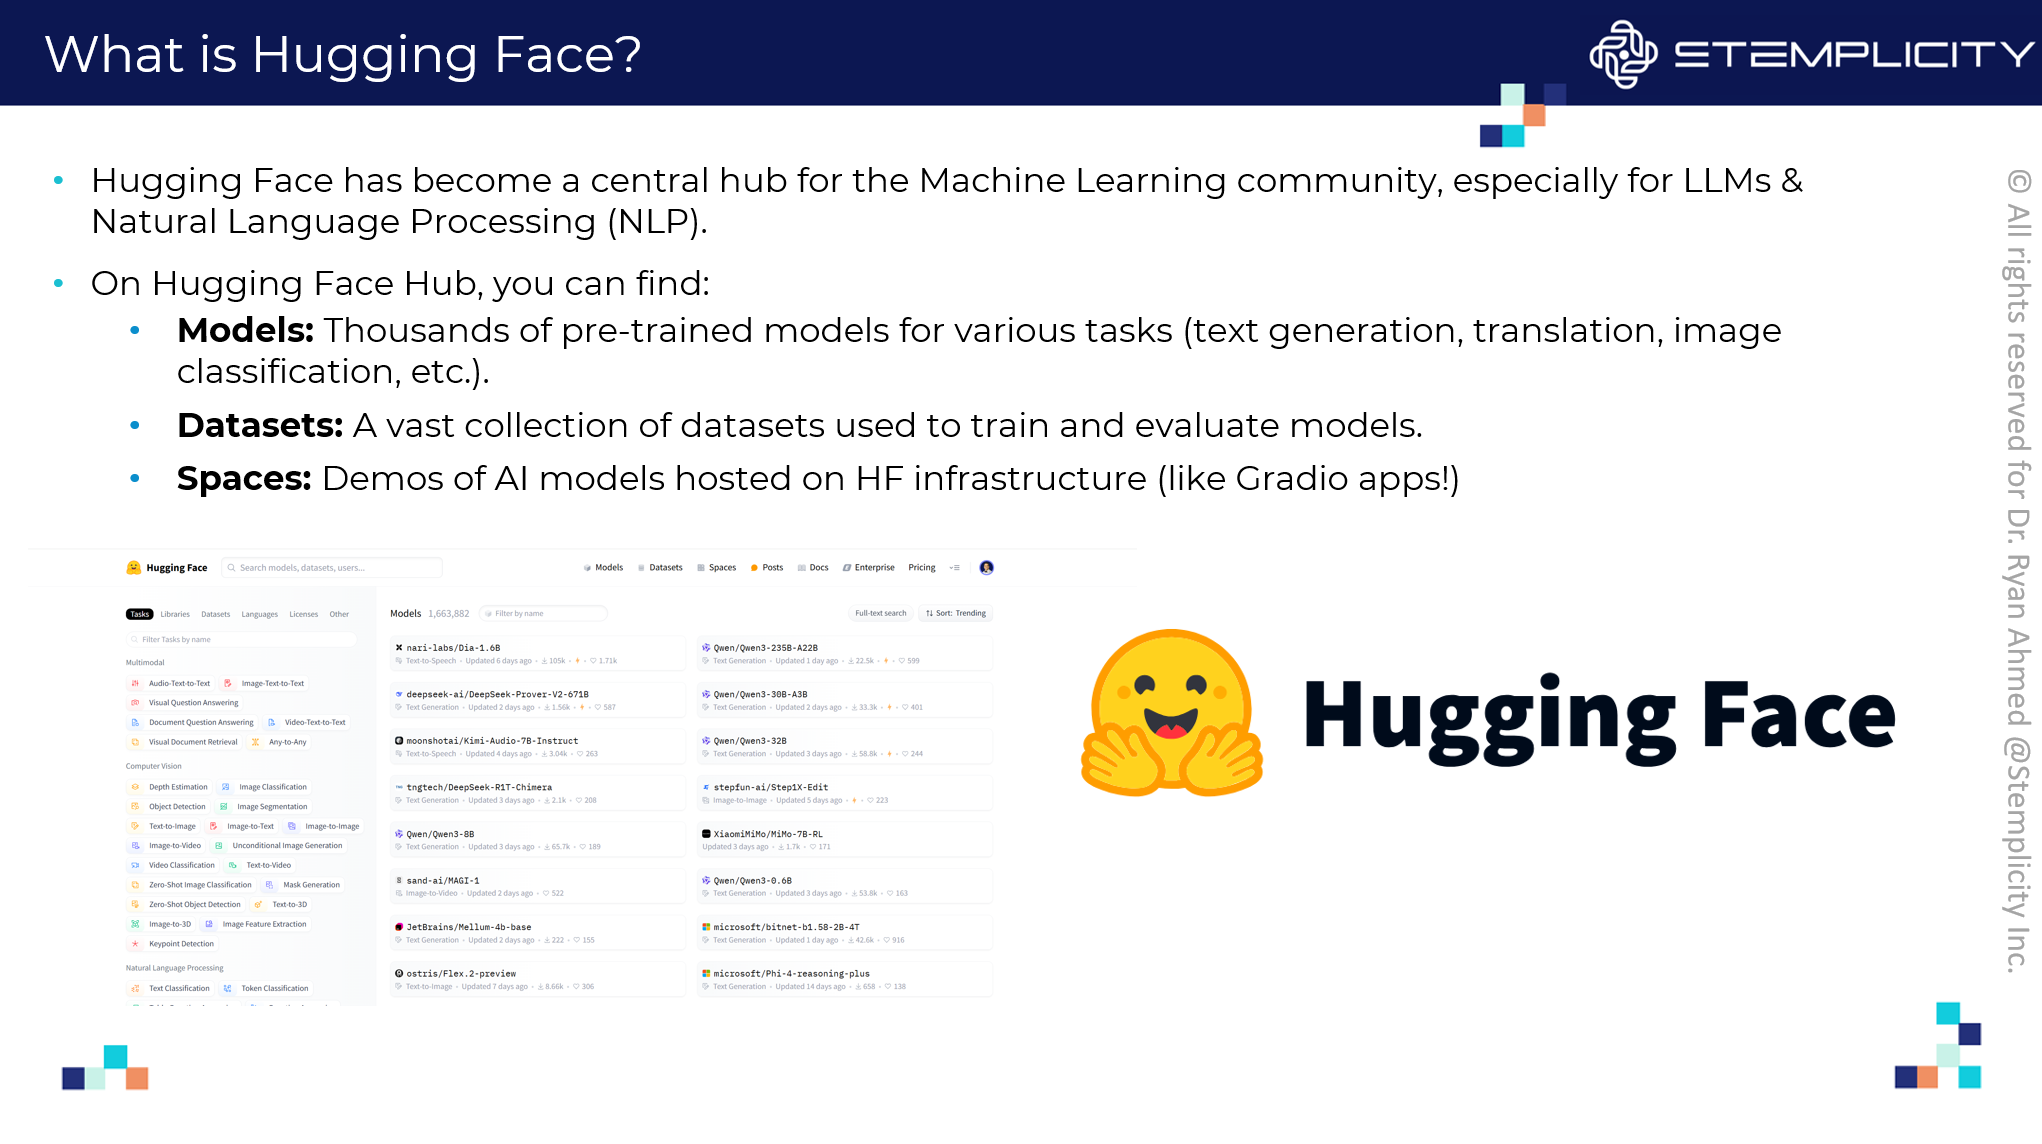

- Hugging Face: https://huggingface.co/models

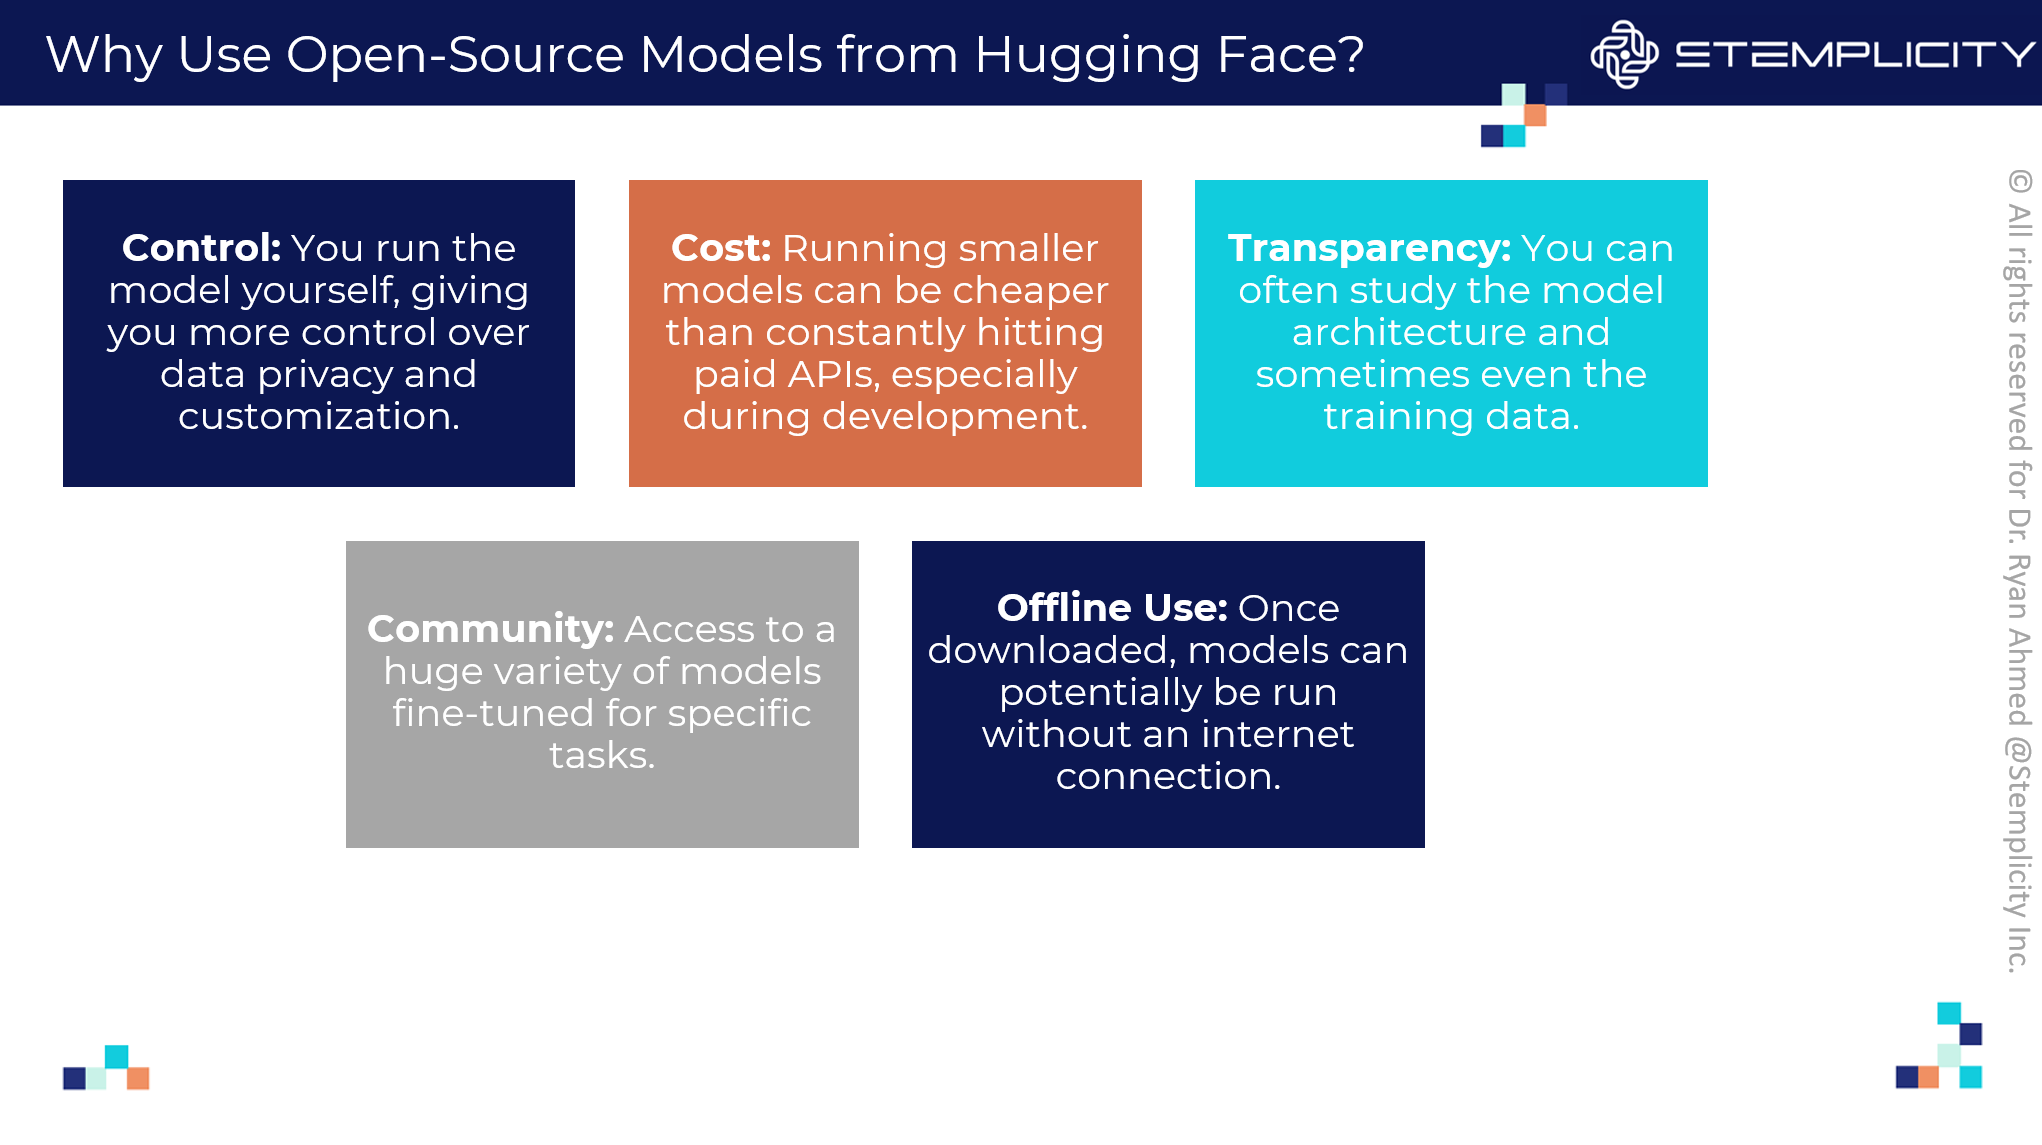

**PRACTICE OPPORTUNITY:**

- **Visit [huggingface.co/models](https://huggingface.co/models) and filter for Text Generation on the left sidebar, find the "Tasks" filter and select "Text Generation".**
- **Sort by Downloads: Near the top right, you can sort the models. Try sorting by "Most Downloads". What are some of the most popular text generation models you see?**
- **Search for models with "phi", "gemma", "qwen", or "llama" in their names, often with numbers like "2b", "1.8b", "1.5", or "4k-instruct". These indicate smaller model sizes more likely to run on our Colab GPU. Click on one (e.g., `microsoft/Phi-3-mini-4k-instruct`). Notice the "Files and versions" tab and the model card (README) explaining the model.**
- **Test Phi-3-mini-4k-instruct Model with the following prompt "Explain Newton's second law of motion as if I am 5 year old"**


# TASK 3. INSTALL KEY LIBRARIES, OBTAIN HF ACCESS TOKENS, & GPU CHECK

We need to install the necessary Python libraries. We'll also need to potentially log in to Hugging Face if we want to use certain models (like some versions of Llama or Gemma) that require user agreement.

**Installing Libraries:**

*   `transformers`: The core Hugging Face library for models and tokenizers.
*   `accelerate`: Helps run models efficiently across different hardware (like GPUs) and use less memory.
*   `bitsandbytes`: Enables model quantization (like loading in 4-bit or 8-bit), drastically reducing memory usage. Essential for running decent models on free Colab GPUs!
*   `torch`: The underlying deep learning framework (PyTorch).
*   `pypdf`: A library to easily extract text from PDF files.


In [ ]:
# Let's install key libraries
print("Installing necessary libraries...")
!pip install -q transformers accelerate bitsandbytes torch pypdf gradio
print("Libraries installed successfully!")

In [ ]:
# Let's import these libraries
import torch  # PyTorch, the backend for transformers
import pypdf  # For reading PDFs
import gradio as gr  # For building the UI
from IPython.display import display, Markdown  # For nicer printing in notebooks
print("Core libraries imported.")

**Hugging Face Hub Login:**

Some models on the Hugging Face Hub are "gated," meaning you need to agree to their terms and conditions before downloading. Logging in allows the `transformers` library to download these models if needed.

*   **Get a Hugging Face Token:**
    1.  Go to [huggingface.co](https://huggingface.co/).
    2.  Sign up or log in.
    3.  Click your profile picture (top right) -> Settings -> Access Tokens.
    4.  Create a new token (a 'read' role is usually sufficient).
    5.  Copy the generated token. **Treat this like a password!**
*   **Log in within Colab:** We'll use a helper function from the `huggingface_hub` library.

In [ ]:
import os
from huggingface_hub import login, notebook_login
print("Attempting Hugging Face login...")

# Use notebook_login() for an interactive prompt in Colab/Jupyter
# This is generally preferred for notebooks.

notebook_login()
print("Login successful (or token already present)!")

In [ ]:
# Check if GPU is available (essential for running these models)
# Why GPU is Important: LLMs involve billions of calculations (matrix multiplications).
# GPUs are designed for massive parallel processing, making these calculations thousands of times faster than a standard CPU.
# Running these models on a CPU would take an impractically long time (hours for a single answer instead of seconds/minutes).
if torch.cuda.is_available():
    print(f"GPU detected: {torch.cuda.get_device_name(0)}")
    # Set default device to GPU
    torch.set_default_device("cuda")
    print("PyTorch default device set to CUDA (GPU).")
else:
    print("WARNING: No GPU detected. Running these models on CPU will be extremely slow!")
    print("Make sure 'GPU' is selected in Runtime > Change runtime type.")

In [ ]:
# Helper function for markdown display
def print_markdown(text):
    """Displays text as Markdown in Colab/Jupyter."""
    display(Markdown(text))

**PRACTICE OPPORTUNITY:**
- **Go to "Runtime" -> "Change runtime type" and explore available hardware accelerator types in your Colab.**
- **Compare CPUs, T4 GPU, A100 GPU from a performance standpoint. What speed gains can developers get by shifting from a CPU to A100 GPU?**

# TASK 4. HUGGING FACE TRANSFORMERS LIBRARY: PIPELINES

- **`transformers`:** A Python library that provides a standardized way to download, load, and use models from the Hub with just a few lines of code. Key classes:
    *   `pipeline()`: A high-level, easy-to-use abstraction for common tasks (like text generation, summarization). Great for quick tests and beginners.
    *   `AutoTokenizer`: Automatically downloads the correct "tokenizer" for a model. A tokenizer converts human-readable text into numerical IDs the model understands.
    *   `AutoModelFor...`: Automatically downloads the correct model architecture and pre-trained weights (e.g., `AutoModelForCausalLM` for text generation models like GPT, Llama, Gemma).
- **Other Libraries:** HF also develops libraries like `accelerate` (for efficient loading/distributed training), `datasets` (for handling datasets), and `evaluate` (for model evaluation metrics).


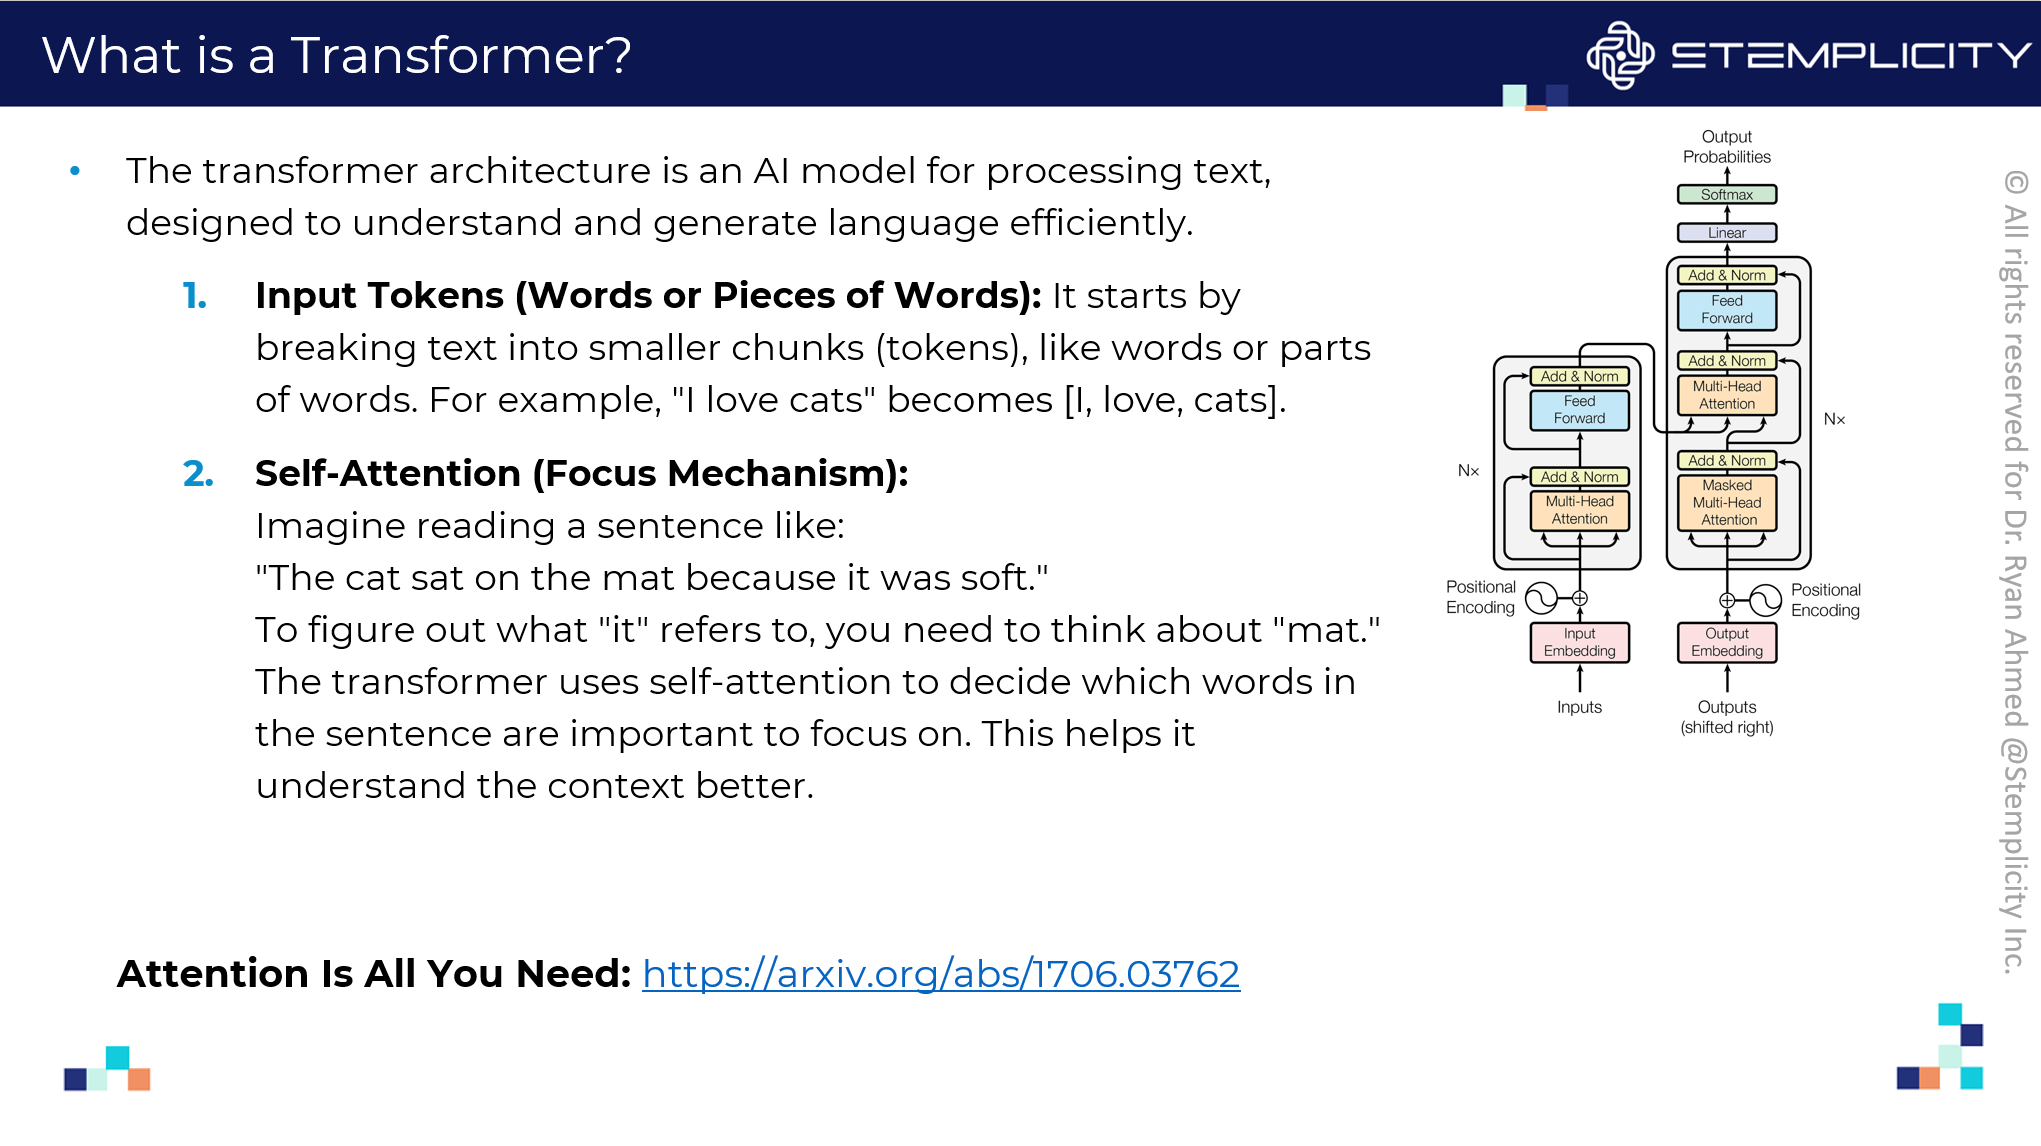

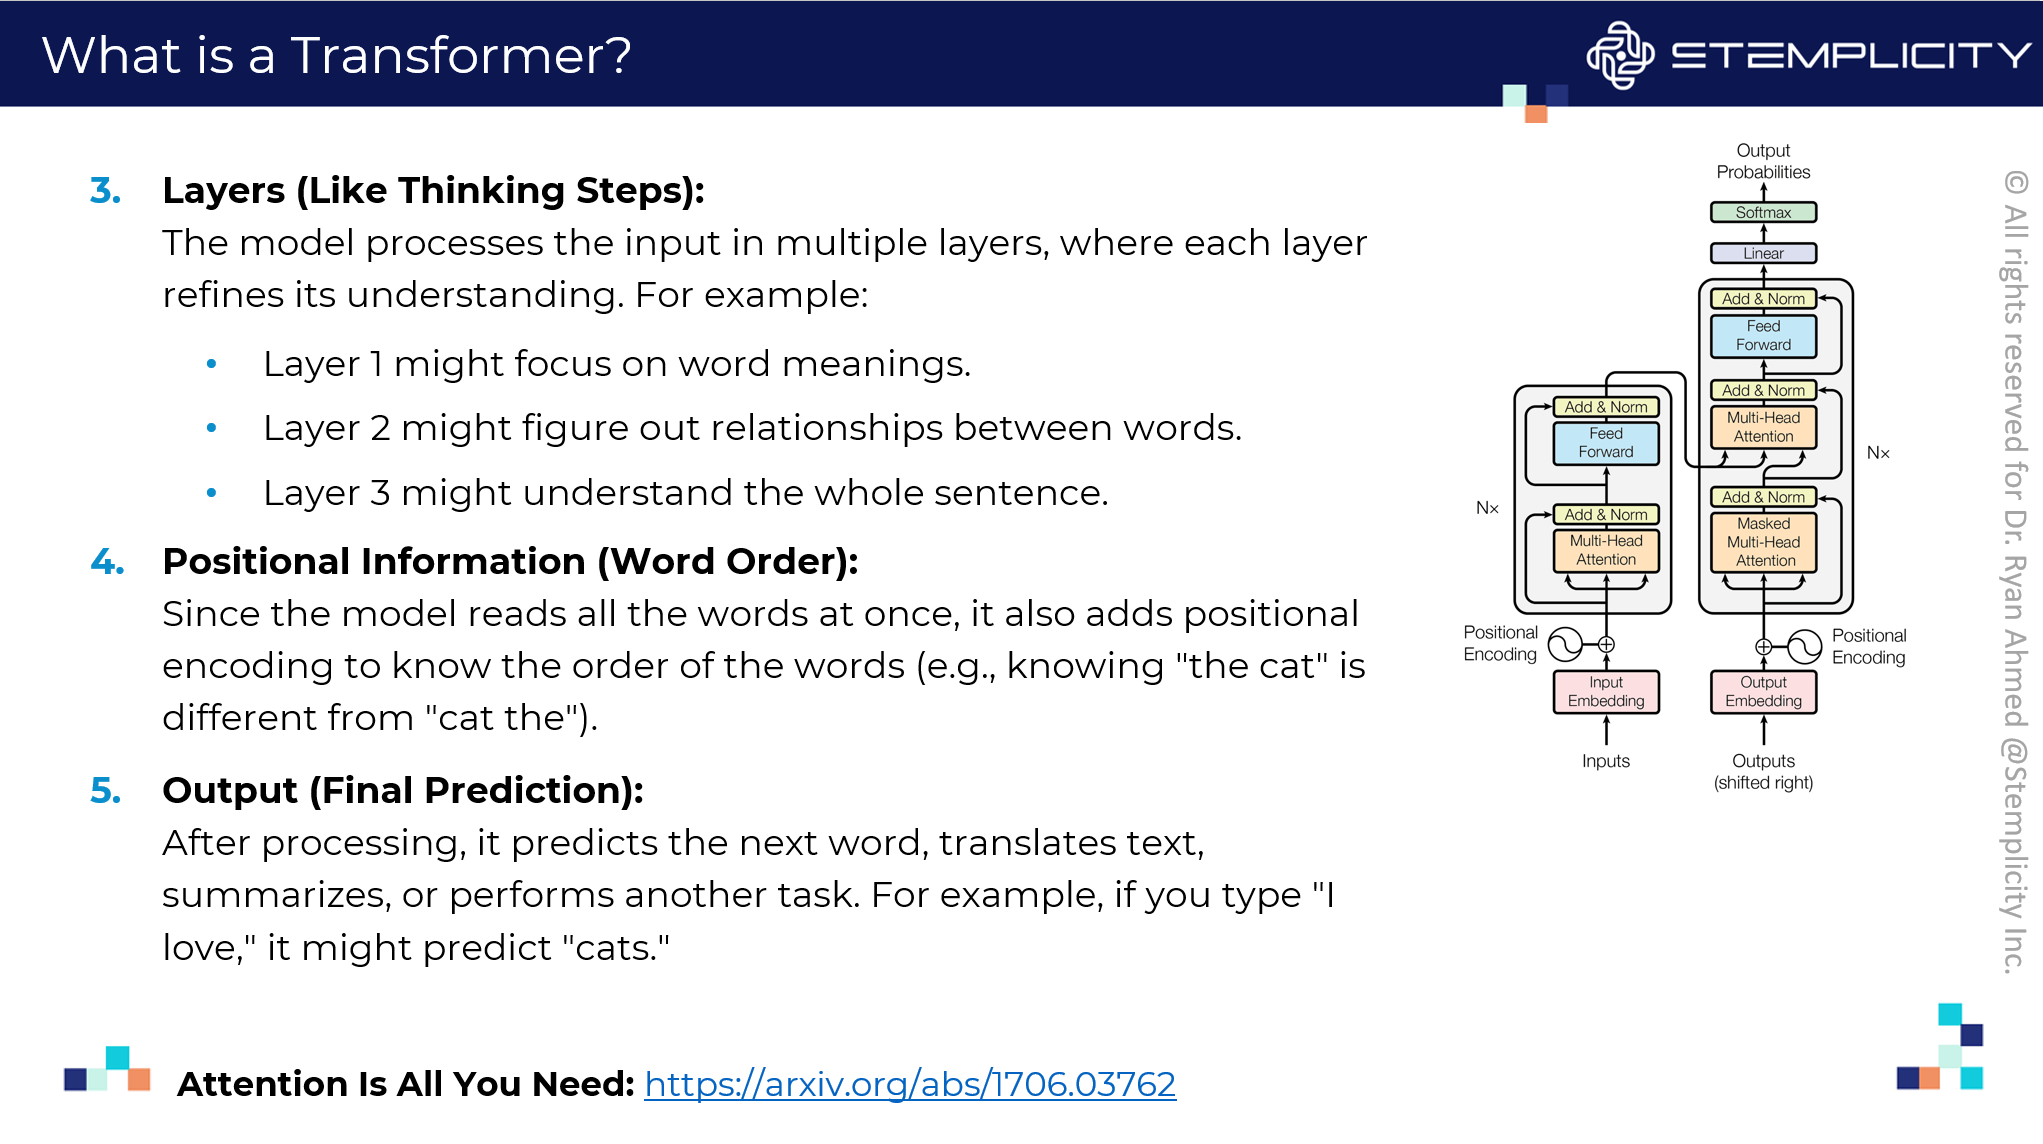

- Attention Is All You Need: https://arxiv.org/abs/1706.03762

In [ ]:
# The pipelines are a great and easy way to use models for inference.
# These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks
# Those tasks include Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering.
from transformers import pipeline

# Load a sentiment classifier model on financial news data
# Check the model here: https://huggingface.co/ProsusAI/finbert
pipe = pipeline(model = "ProsusAI/finbert")
pipe("Apple lost 10 Million dollars today due to US tarrifs")

**PRACTICE OPPORTUNITY:**
- **Use Hugging Face's pipeline() function and the ProsusAI/finbert model to analyze sentiment in financial news using the following examples:**
  - **news_samples = ["Tesla stock surged after record-breaking quarterly earnings.", "Microsoft is scheduled to release its earnings report next week."]**
- **Compare the results with Hugging Face's finbert Inference API and perform a sanity check**


# TASK 5. HUGGING FACE TRANSFORMERS LIBRARY: AUTOTOKENIZERS

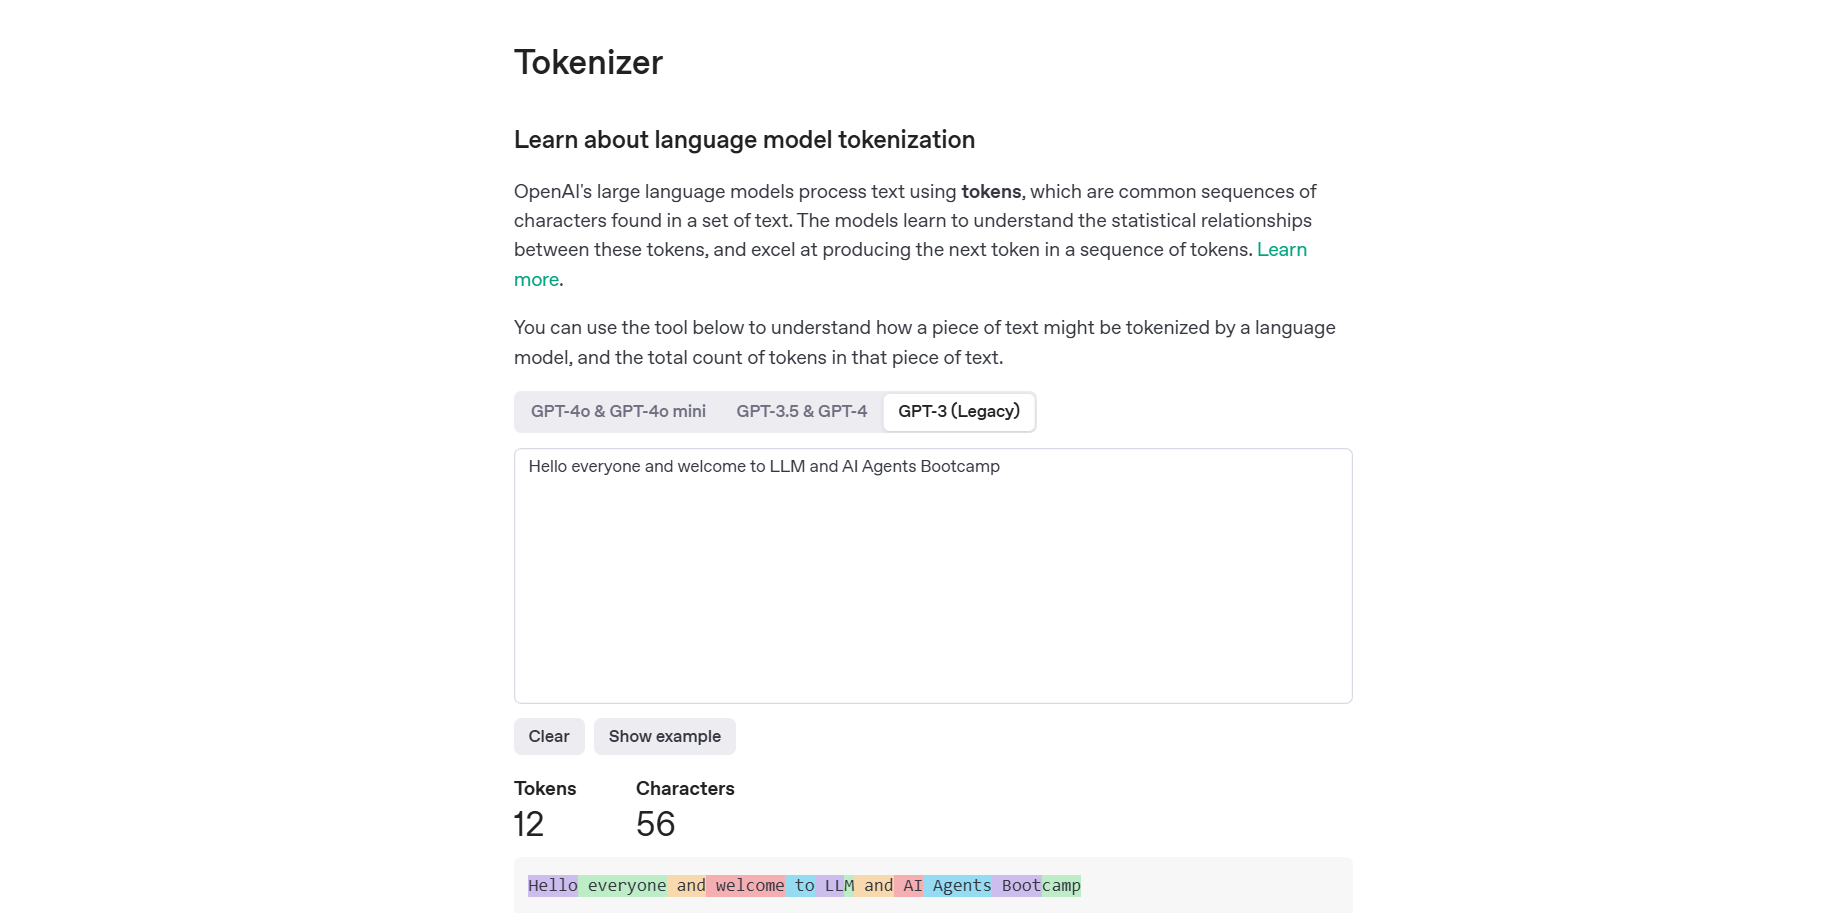

In [ ]:
# Let's explore AutoTokenizer
# A tokenizer converts text into numerical IDs that the model understands
# Check a demo for OpenAI's Tokenizers here: https://platform.openai.com/tokenizer
from transformers import AutoTokenizer

# Load tokenizer for GPT-2
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Encode text to token IDs
tokens = tokenizer("Hello everyone and welcome to LLM and AI Agents Bootcamp")
print(tokens['input_ids'])

**PRACTICE OPPORTUNITY:**
- **Use the AutoTokenizer.from_pretrained() method to load a different tokenizer (e.g., "bert-base-uncased" or "facebook/opt-125m")**
- **Try encoding a new sentence like: "Generative AI is transforming the future of work.**
- **Print both: The raw tokens (tokenizer.tokenize(text)) and the input IDs (tokenizer(text)["input_ids"])**
- **Compare the tokenization between two models. What differences do you observe when handling spaces between words?**

# TASK 6. HUGGING FACE TRANSFORMERS LIBRARY: AutoModelForCausalLM

AutoModelForCausalLM is a Hugging Face class that automatically loads a pretrained model for causal (left-to-right) language modeling, such as GPT, LLaMA, or Gemma.

Let's get hands-on and load a model! We'll start with a relatively small but capable model that should fit comfortably in Colab's free tier GPU memory, thanks to quantization.

**Key Steps:**

1.  **Choose a Model ID:** We need the unique identifier from the Hugging Face Hub (e.g., `"google/gemma-2b-it"` or `"microsoft/Phi-3-mini-4k-instruct"`).
2.  **Load the Tokenizer:** Use `AutoTokenizer.from_pretrained(model_id)` to get the specific tokenizer for that model.
3.  **Load the Model:** Use `AutoModelForCausalLM.from_pretrained(...)` with crucial arguments:
    *   `model_id`: The identifier.
    *   `torch_dtype=torch.float16` (or `bfloat16`): Loads the model using 16-bit floating point numbers instead of 32-bit, saving memory.
    *   `load_in_4bit=True` or `load_in_8bit=True`: This is **quantization** via `bitsandbytes`. It further reduces memory by representing model weights with fewer bits (4 or 8 instead of 16/32). Essential for free Colab! 4-bit saves more memory but might have a tiny impact on quality compared to 8-bit.
    *   `device_map="auto"`: Tells `accelerate` to automatically figure out how to spread the model across available devices (primarily the GPU in our case).
4.  **Combine Tokenizer and Model (Optional but common):** Using the `pipeline` function is often simpler for basic text generation. It handles tokenization, model inference, and decoding back to text for you.


In [ ]:
!pip install -U bitsandbytes

In [ ]:
# Let's import AutoModelForCasualLM
from transformers import AutoModelForCausalLM, BitsAndBytesConfig

# Let's choose a small, powerful model suitable for Colab.
# Alternatives you could try (might need login/agreement):
# model_id = "unsloth/gemma-3-4b-it-GGUF"
# model_id = "Qwen/Qwen2.5-3B-Instruct"
model_id = "microsoft/Phi-4-mini-instruct"
# model_id = "unsloth/Llama-3.2-3B-Instruct"

In [ ]:
# Let's load the Tokenizer
# The tokenizer prepares text input for the model
# trust_remote_code=True is sometimes needed for newer models with custom code.
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code = True)
print("Tokenizer loaded successfully.")

In [ ]:
# Let's Load the Model with Quantization

print(f"Loading model: {model_id}")
print("This might take a few minutes, especially the first time...")

# Create BitsAndBytesConfig for 4-bit quantization
quantization_config = BitsAndBytesConfig(load_in_4bit = True,
                                         bnb_4bit_compute_dtype = torch.float16,  # or torch.bfloat16 if available
                                         bnb_4bit_quant_type = "nf4",  # normal float 4 quantization
                                         bnb_4bit_use_double_quant = True  # use nested quantization for more efficient memory usage
                                         )

# Load the model with the quantization config
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             quantization_config = quantization_config,
                                             device_map = "auto",
                                             trust_remote_code = True)


In [ ]:
# Let's define a prompt
prompt = "Explain how Electric Vehicles work in a funny way!"

In [ ]:
prompt = "What is the capital of France?"

In [ ]:
# Method 1: Let's test the model and Tokenizer using the .generate() method!

# Let's encode the input first
inputs = tokenizer(prompt, return_tensors = "pt")

# Then we will generate the output
outputs = model.generate(**inputs, max_new_tokens = 1000)

response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print_markdown(response)

In [ ]:
# Method 2: alternatively, you can create a pipeline that includes your model and tokenizer
# The pipeline wraps tokenization, generation, and decoding

pipe = pipeline("text-generation",
                model = model,
                tokenizer = tokenizer,
                torch_dtype = "auto", # Match model dtype
                device_map = "auto" # Ensure pipeline uses the same device mapping
                )


outputs = pipe(prompt,
               max_new_tokens = 1000, # max_new_tokens limits the length of the generated response.
               temperature = 1, # temperature controls randomness (lower = more focused).
               )

# Print the generated text
print_markdown(outputs[0]['generated_text'])

**PRACTICE OPPORTUNITY:**

- **Modify the `prompt` variable. Ask a different question, like `"What is the capital of France?"` or `"Write a short poem about a cat."` Run the cell again. How does the model respond?**

# TASK 7. READ PDF DOCUMENTS & EXTRACT TEXT USING PYPDF LIBRARY


Now that we have a model loaded, we need the text from our document to ask questions about. We'll use the `pypdf` library to extract text from a PDF file.

For this example, we'll download a sample PDF about climate change. You can easily adapt this to use your own PDF by uploading it to Colab.

**Steps:**
1.  **Get the PDF:** Download it or specify the path if uploaded.
2.  **Open the PDF:** Use `pypdf.PdfReader`.
3.  **Iterate Through Pages:** Loop through each page in the PDF.
4.  **Extract Text:** Use `page.extract_text()`.
5.  **Combine Text:** Join the text from all pages into a single string.

In [ ]:
import requests
from pathlib import Path

# --- Get the PDF File ---
pdf_url = "https://abc.xyz/assets/66/ae/c94682fc4137b5fb90a5d709ac4b/2025-q1-earnings-transcript.pdf"
pdf_filename = "google_earning_transcript.pdf"
pdf_path = Path(pdf_filename)

# Download the file if it doesn't exist
if not pdf_path.exists():
    response = requests.get(pdf_url)
    response.raise_for_status()  # Check for download errors
    pdf_path.write_bytes(response.content)
    print(f"PDF downloaded successfully to {pdf_path}")
else:
    print(f"PDF file already exists at {pdf_path}")


# --- Read Text from PDF using pypdf ---
pdf_text = ""

print(f"Reading text from {pdf_path}...")
reader = pypdf.PdfReader(pdf_path)
num_pages = len(reader.pages)
print(f"PDF has {num_pages} pages.")

# Extract text from each page
all_pages_text = []
for i, page in enumerate(reader.pages):

    page_text = page.extract_text()
    if page_text:  # Only add if text extraction was successful
        all_pages_text.append(page_text)
    # print(f"Read page {i+1}/{num_pages}") # Uncomment for progress

# Join the text from all pages
pdf_text = "\n".join(all_pages_text)
print(f"Successfully extracted text. Total characters: {len(pdf_text)}")


In [ ]:
# Display a small snippet of the PDF
print("\n--- Snippet of Extracted Text ---")
print_markdown(f"{pdf_text[:1000]}")



--- Snippet of Extracted Text ---


 
This  transcript  is  provided  for  the  convenience  of  investors  only,  for  a  full  recording  please  see  the  Q1  2025  Earnings  Call  webcast.    Operator:  Welcome,  everyone.  Thank  you  for  standing  by  for  the  Alphabet  First  Quarter  2025  
Earnings
 
conference
 
call.
 
  At  this  time,  all  participants  are  in  a  listen-only  mode.  After  the  speaker  presentations,  there  will  
be
 
a
 
question-and-answer
 
session.
 
To
 
ask
 
a
 
question
 
during
 
the
 
session,
 
you
 
will
 
need
 
to
 
press
 
*1
 
on
 
your
 
telephone.
  I  would  now  like  to  hand  the  conference  over  to  your  speaker  today,  Jim  Friedland,  Senior  
Director
 
of
 
Investor
 
Relations.
 
Please
 
go
 
ahead.
 
  Jim  Friedland,  Senior  Director,  Investor  Relations:  Thank  you.  Good  afternoon,  everyone,  
and
 
welcome
 
to
 
Alphabet's
 
First
 
Quarter
 
2025
 
Earnings
 
Conference
 
Call.
 
With
 
us
 
today
 
are
 
Sundar
 
Pichai,
 
Philipp
 
Schin

**PRACTICE OPPORTUNITY:**
- **Print the last 500 characters of the PDF Document.**
- **Compare the results to the PDF content and perform a sanity check.**

# TASK 8. BUILD THE Q&A LOGIC & PROMPT THE MODEL

Now we have the two key ingredients:
1.  A loaded open-source LLM (and its tokenizer/pipeline).
2.  The text content extracted from our PDF document.

We need to combine these to answer user questions. The core idea is **prompt engineering**: We'll create a prompt that includes both the user's question and the relevant document context, instructing the model to answer based only on that context.

**Steps:**
1.  **Define a Prompt Template:** Create a string that structures the input for the LLM. This typically includes placeholders for the context (PDF text) and the question.
2.  **Create an Answering Function:** Write a Python function that takes the PDF text, the user question, and the model/tokenizer (or pipeline) as input.
3.  **Format the Prompt:** Inside the function, fill the template with the actual PDF text and question.
4.  **Handle Context Length:** LLMs have a maximum context window (how much text they can read at once). Our sample PDF might be too long! For simplicity now, we might just truncate the PDF text if it's excessive. More advanced techniques involve chunking the document and retrieving only relevant parts, but we'll keep it basic here.
5.  **Run Inference:** Send the formatted prompt to the model pipeline.
6.  **Extract the Answer:** Process the model's output to get just the answer part.


In [ ]:
# Define a limit for the context length to avoid overwhelming the model

MAX_CONTEXT_CHARS = 6000

def answer_question_from_pdf(document_text, question, llm_pipeline):
    """
    Answers a question based on the provided document text using the loaded LLM pipeline.

    Args:
        document_text (str): The text extracted from the PDF.
        question (str): The user's question.
        llm_pipeline (transformers.pipeline): The initialized text-generation pipeline.

    Returns:
        str: The model's generated answer.
    """
    # Truncate context if necessary
    if len(document_text) > MAX_CONTEXT_CHARS:
        print(f"Warning: Document text ({len(document_text)} chars) exceeds limit ({MAX_CONTEXT_CHARS} chars). Truncating.")
        context = document_text[:MAX_CONTEXT_CHARS] + "..."
    else:
        context = document_text

    # Let's define the Prompt Template
    # We instruct the model to use only the provided document.
    # Using a format the model expects (like Phi-3's chat format) can improve results.
    # <|system|> provides context/instructions, <|user|> is the question.
    # Note: Different models might prefer different prompt structures.
    prompt_template = f"""<|system|>
    You are an AI assistant. Answer the following question based *only* on the provided document text. If the answer is not found in the document, say "The document does not contain information on this topic." Do not use any prior knowledge.

    Document Text:
    ---
    {context}
    ---
    <|end|>
    <|user|>
    Question: {question}<|end|>
    <|assistant|>
    Answer:""" # We prompt the model to start generating the answer

    print(f"\n--- Generating Answer for: '{question}' ---")

    # Run Inference on the chosen model
    outputs = llm_pipeline(prompt_template,
                           max_new_tokens = 500,  # Limit answer length
                           do_sample = True,
                           temperature = 0.2,   # Lower temperature for more factual Q&A
                           top_p = 0.9)

    # Let's extract the answer
    # The output includes the full prompt template. We need the text generated *after* it.
    full_generated_text = outputs[0]['generated_text']
    answer_start_index = full_generated_text.find("Answer:") + len("Answer:")
    raw_answer = full_generated_text[answer_start_index:].strip()

    # Sometimes the model might still include parts of the prompt or trail off.
    # Basic cleanup: Find the end-of-sequence token if possible, or just return raw.
    # Phi-3 uses <|end|> or <|im_end|>
    end_token = "<|end|>"
    if end_token in raw_answer:
            raw_answer = raw_answer.split(end_token)[0]

    print("--- Generation Complete ---")
    return raw_answer


In [ ]:
# Let's test the function
test_question = "What is this document about?"
generated_answer = answer_question_from_pdf(pdf_text, test_question, pipe)

print("\nTest Question:")
print_markdown(f"**Q:** {test_question}")
print("\nGenerated Answer:")
print_markdown(f"**A:** {generated_answer}")


--- Generating Answer for: 'What is this document about?' ---
--- Generation Complete ---

Test Question:


**Q:** What is this document about?


Generated Answer:


**A:** This document is about Alphabet's First Quarter 2025 Earnings Conference Call, where Jim Friedland, Senior Director of Investor Relations, presents the company's financial performance and forward-looking statements. CEO Sundar Pichai discusses the company's growth in various business areas, including AI and cloud services, and highlights the progress in AI infrastructure and research. The document also mentions the release of Gemini 2.5 Pro, a state-of-the-art AI model, and the introduction of 2.5 Flash for developers.

**PRACTICE OPPORTUNITY:**
- **Try asking a different question about the earnings call transcript and test the model. Try "How many monthly users are using AI?"**

# TASK 9. SWITCH MODELS & BUILD GRADIO INTERFACE

We have a working Q&A system with one model. But the beauty of Hugging Face is the vast choice! Let's adapt our setup to easily switch between different open-source models and build a Gradio interface to interact with it.

**Challenges & Approach:**

*   **Loading Multiple Models:** Loading several LLMs simultaneously (even quantized) will likely exceed Colab's free GPU memory.
*   **Solution:** We'll load one model at a time based on the user's selection in the Gradio interface. This means unloading the previous model before loading the new one. This will introduce a loading delay when switching models, but it's necessary for memory constraints.

**Steps:**

1.  **Define Model Choices:** Create a dictionary mapping user-friendly names (e.g., "Phi-3 Mini") to their Hugging Face model IDs. Include models known to work in Colab free tier with 4-bit quantization.
2.  **Global State:** Keep track of the currently loaded model and tokenizer globally (or using Gradio's `State`).
3.  **Model Loading Function:** Create a function `load_model(model_id)` that handles unloading the old model (if any) and loading the new tokenizer and quantized model. It should return the new `pipeline`.
4.  **Gradio Interface:**
    *   Use `gr.Blocks` for more layout control.
    *   Add a `gr.Dropdown` for the user to select the desired model.
    *   Add a `gr.Textbox` for the user's question.
    *   Add a `gr.Textbox` (or `gr.Markdown`) for the output answer.
    *   Add a `gr.Button` to submit the question.
5.  **Event Handling:**
    *   When the dropdown selection changes, trigger the `load_model` function. Show a loading indicator.
    *   When the submit button is clicked, call our `answer_question_from_pdf` function, passing the current PDF text, the question, and the currently loaded pipeline.


In [ ]:
# Make sure we have the pdf_text
# Configuration: Models available for selection
# Use models known to fit in Colab free tier with 4-bit quantization

available_models = {
    "Llama 3.2": "unsloth/Llama-3.2-3B-Instruct",
    "Microsoft Phi-4 Mini": "microsoft/Phi-4-mini-instruct",
    "Google Gemma 3": "unsloth/gemma-3-4b-it-GGUF"
    }

In [ ]:
# --- Global State (or use gr.State in Blocks) ---
# To keep track of the currently loaded model/pipeline
current_model_id = None
current_pipeline = None
print(f"Models available for selection: {list(available_models.keys())}")


# Define a function to Load/Switch Models
def load_llm_model(model_name):
    """Loads the selected LLM, unloading the previous one."""
    global current_model_id, current_pipeline, tokenizer, model

    new_model_id = available_models.get(model_name)
    if not new_model_id:
        return "Invalid model selected.", None  # Return error message and None pipeline

    if new_model_id == current_model_id and current_pipeline is not None:
        print(f"Model {model_name} is already loaded.")
        # Indicate success but don't reload
        return f"{model_name} already loaded.", current_pipeline

    print(f"Switching to model: {model_name} ({new_model_id})...")

    # Unload previous model (important for memory)
    # Clear variables and run garbage collection
    current_pipeline = None
    if "model" in locals():
        del model
    if "tokenizer" in locals():
        del tokenizer
    if "pipe" in locals():
        del pipe
    torch.cuda.empty_cache()  # Clear GPU memory cache
    import gc

    gc.collect()
    print("Previous model unloaded (if any).")

    # --- Load the new model ---
    loading_message = f"Loading {model_name}..."
    try:
        # Load Tokenizer
        tokenizer = AutoTokenizer.from_pretrained(new_model_id, trust_remote_code = True)

        # Load Model (Quantized)
        model = AutoModelForCausalLM.from_pretrained(new_model_id,
                                                     torch_dtype = "auto",  # "torch.float16", # Or bfloat16 if available
                                                     load_in_4bit = True,
                                                     device_map = "auto",
                                                     trust_remote_code = True)

        # Create Pipeline
        loaded_pipeline = pipeline(
            "text-generation", model = model, tokenizer = tokenizer, torch_dtype = "auto", device_map = "auto")

        print(f"Model {model_name} loaded successfully!")
        current_model_id = new_model_id
        current_pipeline = loaded_pipeline  # Update global state
        # Use locals() or return values with gr.State for better Gradio practice
        return f"{model_name} loaded successfully!", loaded_pipeline  # Status message and the pipeline object

    except Exception as e:
        print(f"Error loading model {model_name}: {e}")
        current_model_id = None
        current_pipeline = None
        return f"Error loading {model_name}: {e}", None  # Error message and None pipeline

Models available for selection: ['Llama 3.2', 'Microsoft Phi-4 Mini', 'Google Gemma 3', 'Qwen 2.5']


In [ ]:
# --- Function to handle Q&A Submission ---
# This function now relies on the globally managed 'current_pipeline'
# In a more robust Gradio app, you'd pass the pipeline via gr.State
def handle_submit(question):
    """Handles the user submitting a question."""
    if not current_pipeline:
        return "Error: No model is currently loaded. Please select a model."
    if not pdf_text:
        return "Error: PDF text is not loaded. Please run Section 4."
    if not question:
        return "Please enter a question."

    print(f"Handling submission for question: '{question}' using {current_model_id}")
    # Call the Q&A function defined in Section 5
    answer = answer_question_from_pdf(pdf_text, question, current_pipeline)
    return answer



In [ ]:

# --- Build Gradio Interface using Blocks ---
print("Building Gradio interface...")
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown(
        f"""
    # PDF Q&A Bot Using Hugging Face Open-Source Models
    Ask questions about the document ('{pdf_filename}' if loaded, {len(pdf_text)} chars).
    Select an open-source LLM to answer your question.
    **Note:** Switching models takes time as the new model needs to be downloaded and loaded into the GPU.
    """
    )

    # Store the pipeline in Gradio state for better practice (optional for this simple version)
    # llm_pipeline_state = gr.State(None)

    with gr.Row():
        model_dropdown = gr.Dropdown(
            choices=list(available_models.keys()),
            label="🤖 Select LLM Model",
            value=list(available_models.keys())[0],  # Default to the first model
        )
        status_textbox = gr.Textbox(label="Model Status", interactive=False)

    question_textbox = gr.Textbox(
        label="❓ Your Question", lines=2, placeholder="Enter your question about the document here..."
    )
    submit_button = gr.Button("Submit Question", variant="primary")
    answer_textbox = gr.Textbox(label="💡 Answer", lines=5, interactive=False)

    # --- Event Handlers ---
    # When the dropdown changes, load the selected model
    model_dropdown.change(
        fn = load_llm_model,
        inputs = [model_dropdown],
        outputs = [status_textbox],  # Update status text. Ideally also update a gr.State for the pipeline
        # outputs=[status_textbox, llm_pipeline_state] # If using gr.State
    )

    # When the button is clicked, call the submit handler
    submit_button.click(
        fn = handle_submit,
        inputs = [question_textbox],
        outputs = [answer_textbox],
        # inputs=[question_textbox, llm_pipeline_state], # Pass state if using it
    )

    # --- Initial Model Load ---
    # Easier: Manually load first model *before* launching Gradio for simplicity here
    initial_model_name = list(available_models.keys())[0]
    print(f"Performing initial load of default model: {initial_model_name}...")
    status, _ = load_llm_model(initial_model_name)
    status_textbox.value = status  # Set initial status
    print("Initial load complete.")


# --- Launch the Gradio App ---
print("Launching Gradio demo...")
demo.launch(debug=True)  # debug=True provides more detailed logs

Building Gradio interface...
Performing initial load of default model: Llama 3.2...
Switching to model: Llama 3.2 (unsloth/Llama-3.2-3B-Instruct)...
Previous model unloaded (if any).


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Error loading model Llama 3.2: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 7971 has 14.74 GiB memory in use. Of the allocated memory 14.54 GiB is allocated by PyTorch, and 64.84 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Initial load complete.
Launching Gradio demo...
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://174d3

Switching to model: Qwen 2.5 (Qwen/Qwen2.5-3B-Instruct)...
Previous model unloaded (if any).


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

Device set to use cuda:0


Model Qwen 2.5 loaded successfully!
Handling submission for question: 'What quarter and year does this document cover?' using Qwen/Qwen2.5-3B-Instruct

--- Generating Answer for: 'What quarter and year does this document cover?' ---
--- Generation Complete ---


In [ ]:
# What quarter and year does this document cover?

**PRACTICE OPPORTUNITY:**
- **Visit Hugging Face Hub and choose a different model such as "Qwen 2.5". Choose a resonable model size.**
- **Modify the code above to add a new model to the list of available Models.**
- **Test the newly added model and comment on the its performance**

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:**

- **Visit [huggingface.co/models](https://huggingface.co/models) and filter for Text Generation on the left sidebar, find the "Tasks" filter and select "Text Generation". Near the top right, you can sort the models. Try sorting by "Most Downloads". What are some of the most popular text generation models you see?**
- **Search for models with "phi", "gemma", "qwen", or "llama" in their names, often with numbers like "2b", "1.8b", "1.5", or "4k-instruct". These indicate smaller model sizes more likely to run on our Colab GPU. Click on one (e.g., `microsoft/Phi-3-mini-4k-instruct`). Notice the "Files and versions" tab and the model card (README) explaining the model.**
- **Test Phi-3-mini-4k-instruct Model with the following prompt "Explain Newton's second law of motion as if I am 5 year old"**



In [ ]:
# The most downloaded model is phi-2-GGUF at 37 Million downloads (at the time of the recording)

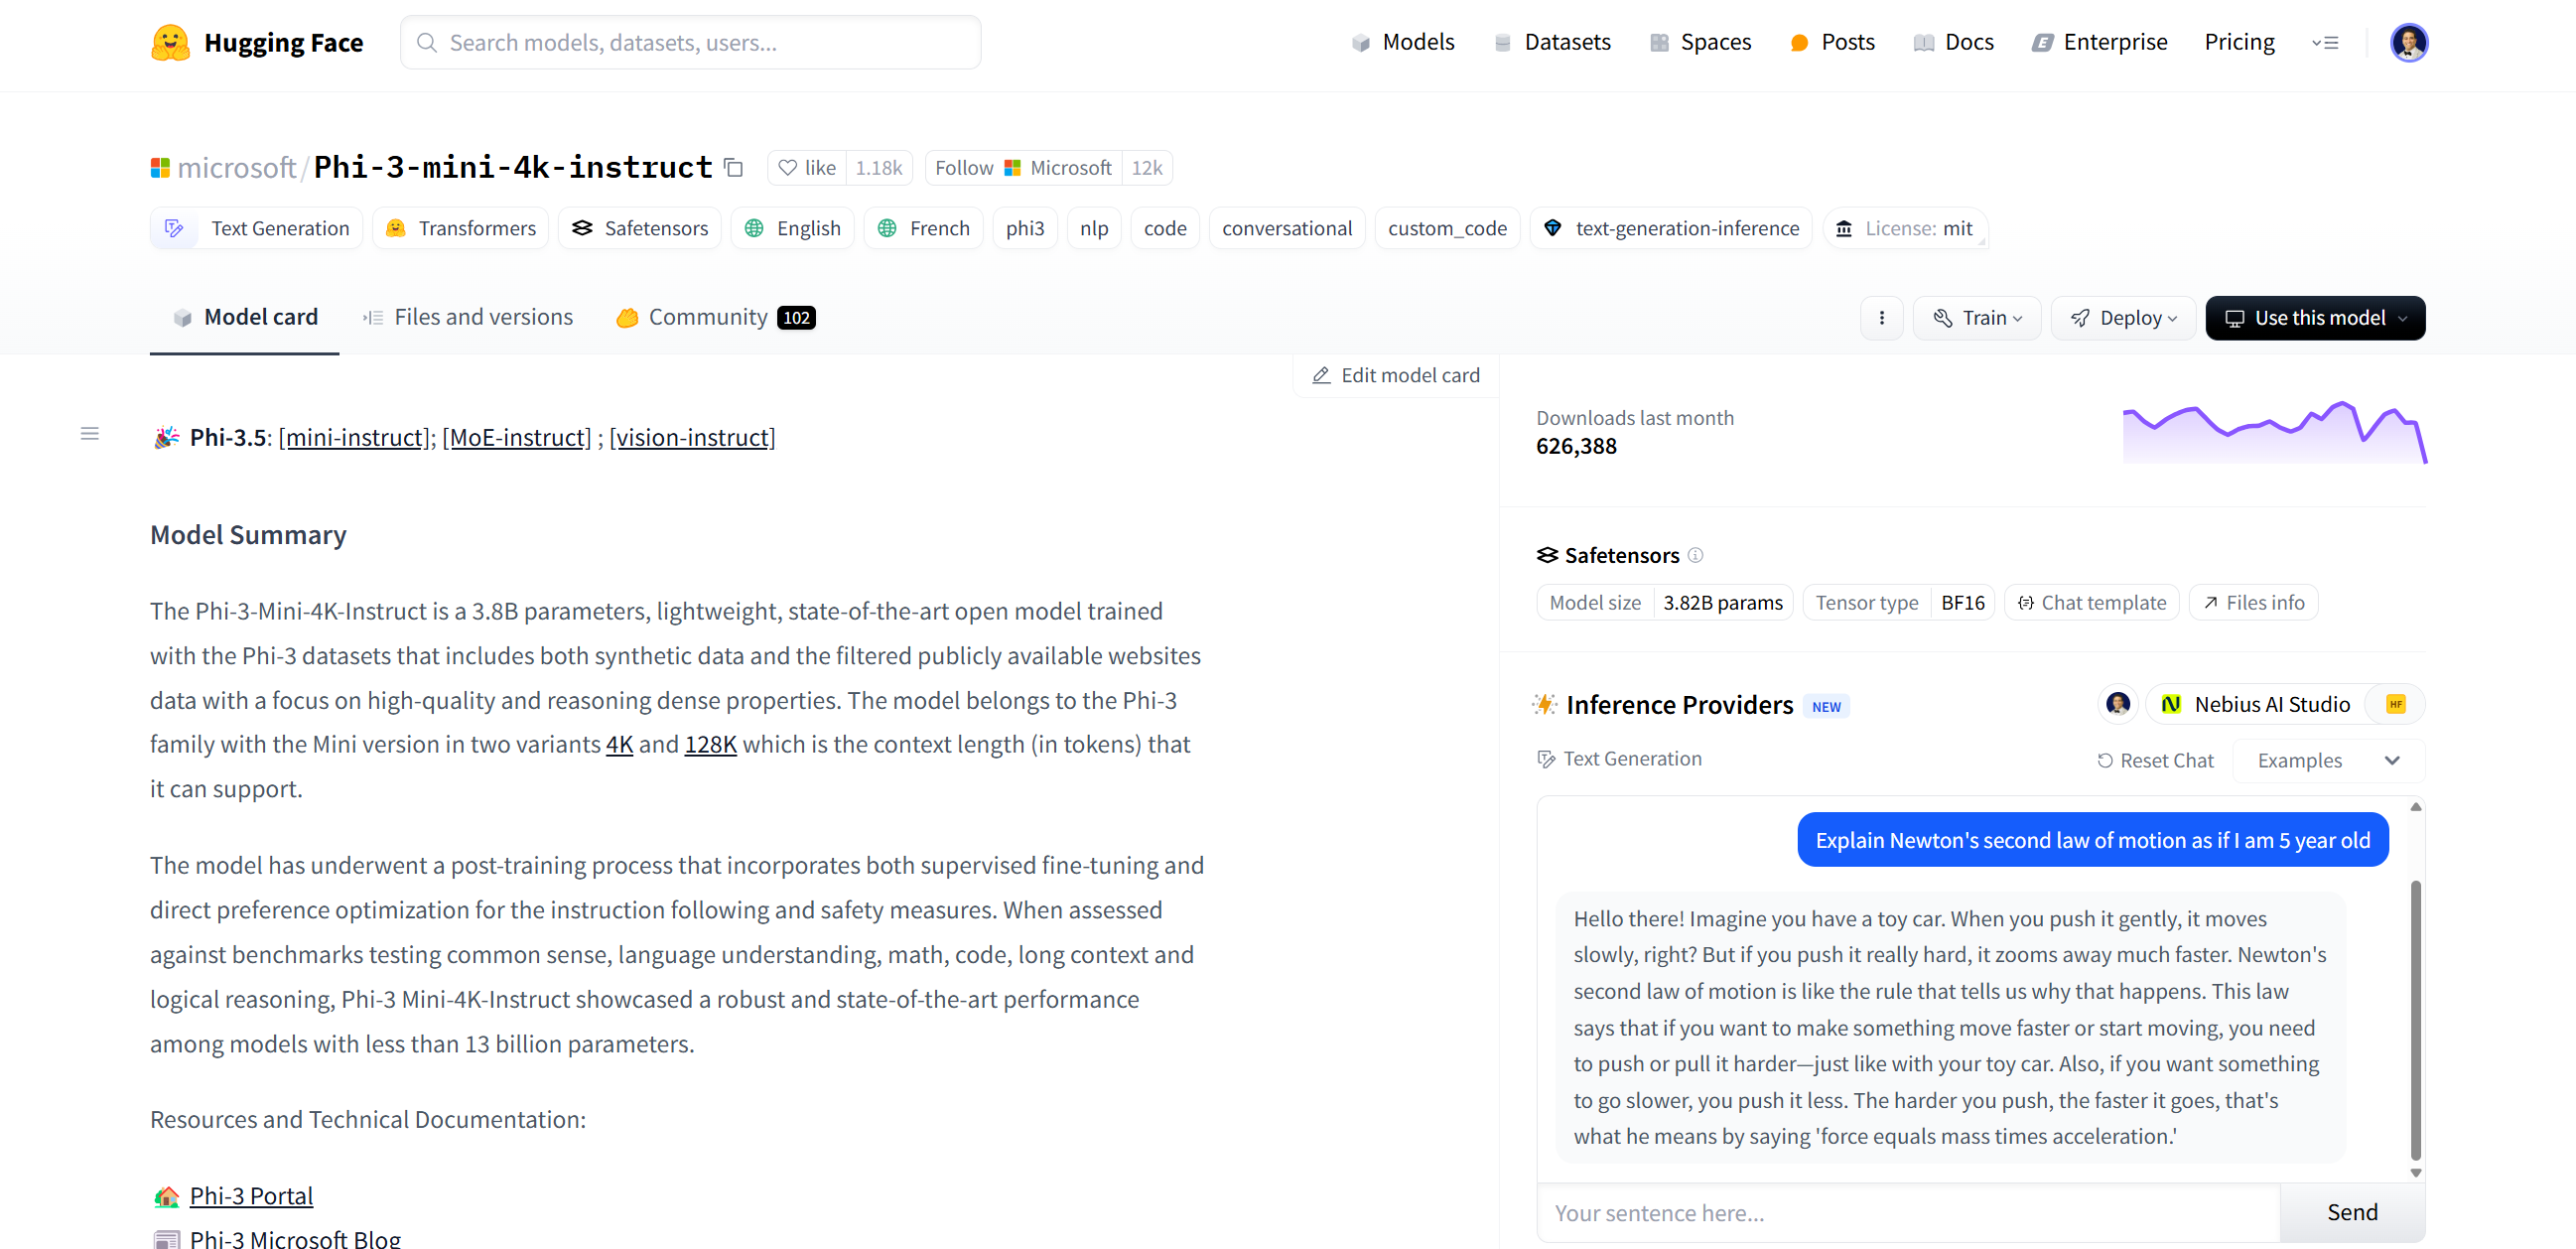

**PRACTICE OPPORTUNITY SOLUTION:**
- **Go to "Runtime" -> "Change runtime type" and explore available hardware accelerator types in your Colab.**
- **Compare CPUs, T4 GPU, A100 GPU from a performance standpoint. What speed gains can developers get by shifting from a CPU to A100 GPU?**

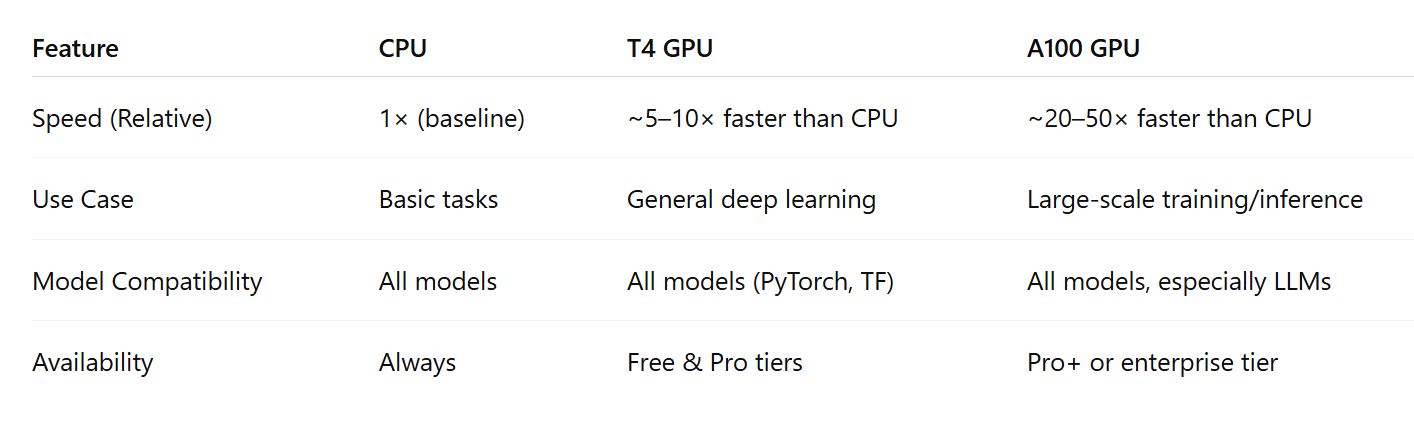

A100 GPUs: https://www.nvidia.com/en-us/data-center/a100/

**PRACTICE OPPORTUNITY SOLUTION:**
- **Use Hugging Face's pipeline() function and the ProsusAI/finbert model to analyze sentiment in financial news using the following examples:**
  - **news_samples = ["Tesla stock surged after record-breaking quarterly earnings.", "Microsoft is scheduled to release its earnings report next week."]**
- **Compare the results with Hugging Face's finbert Inference API and perform a sanity check**

In [ ]:
# Load a sentiment classifier model on financial news data
pipe = pipeline(model = "ProsusAI/finbert")
pipe("Tesla stock surged after record-breaking quarterly earnings")

In [ ]:
# Load a sentiment classifier model on financial news data
# pipe = pipeline(model = "ProsusAI/finbert")
pipe("Microsoft is scheduled to release its earnings report next week.")

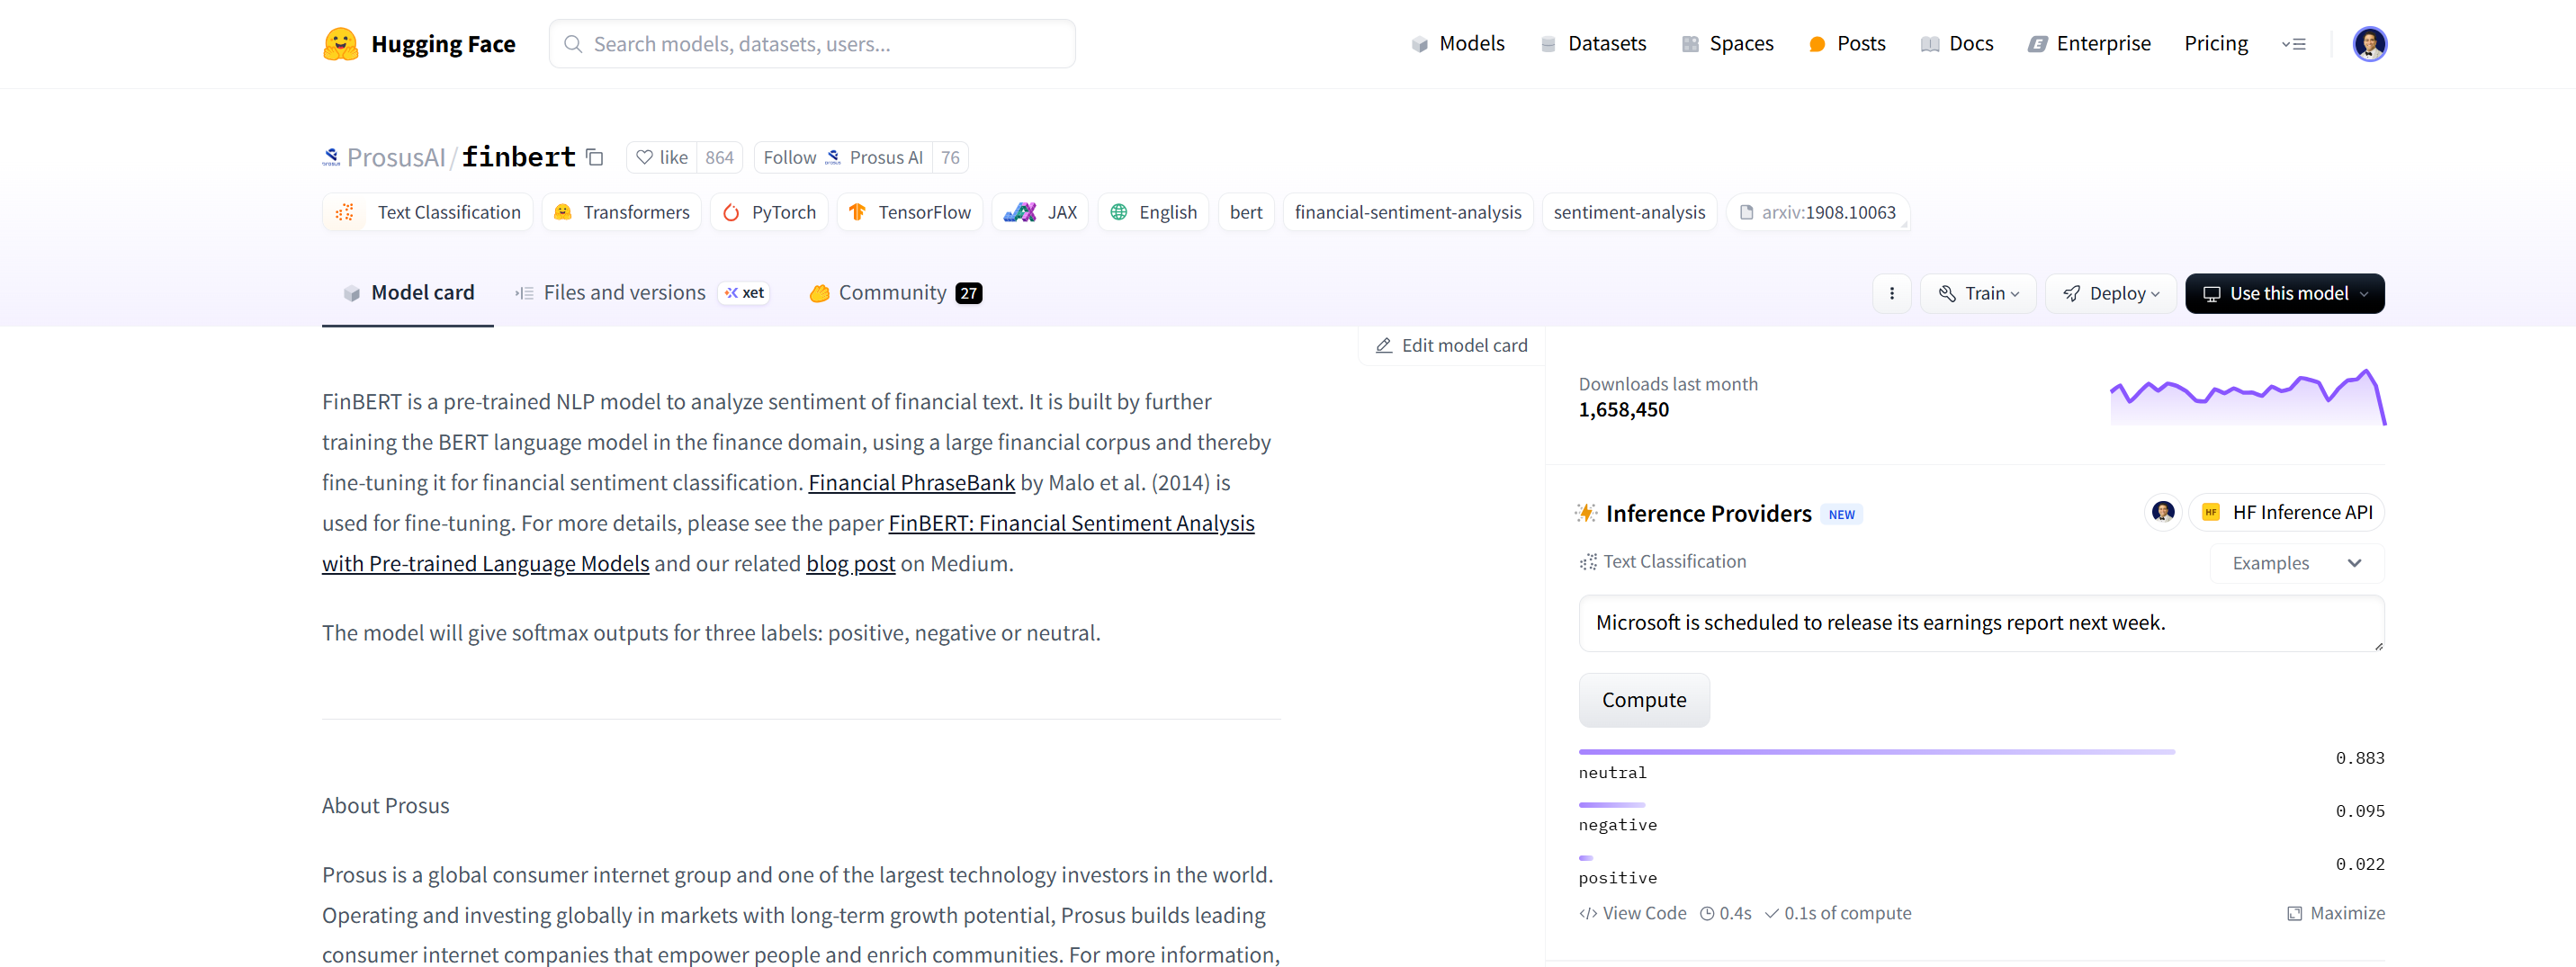

**PRACTICE OPPORTUNITY SOLUTION:**
- **Use the AutoTokenizer.from_pretrained() method to load a different tokenizer (e.g., "bert-base-uncased" or "facebook/opt-125m")**
- **Try encoding a new sentence like: "Generative AI is transforming the future of work.**
- **Print both: The raw tokens (tokenizer.tokenize(text)) and the input IDs (tokenizer(text)["input_ids"])**
- **Compare the tokenization between two models. What differences do you observe when handling spaces between words?**

In [ ]:
# Define input text to both tokenizers
text = "AI is transforming industries and the future of work."

In [ ]:
# Load tokenizer for BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize and encode
tokens = tokenizer.tokenize(text)
token_ids = tokenizer(text)["input_ids"]

# Print tokens and token IDs
print("Tokens:", tokens)
print("Token IDs:", token_ids)

In [ ]:
# Let's try OpenAI's GPT-2 Tokenizer instead
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokens = tokenizer.tokenize(text)
token_ids = tokenizer(text)["input_ids"]
print("GPT-2 Tokens:", tokens)
print("GPT-2 Token IDs:", token_ids)

**PRACTICE OPPORTUNITY SOLUTION:**

- **Modify the `prompt` variable. Ask a different question, like `"What is the capital of France?"` or `"Write a short poem about a cat."` Run the cell again. How does the model respond?**
- **Try a different model such as `microsoft/Phi-4-mini-instruct` and compare the outputs from both models**

In [ ]:
# Choose a new Prompt
prompt = "What is the capital of France?"

**PRACTICE OPPORTUNITY SOLUTION:**
- **Print the last 500 characters of the PDF Document.**
- **Compare the results to the PDF content and perform a sanity check.**

In [ ]:
# Display a small snippet of the PDF
print("\n--- Snippet of Extracted Text ---")
print_markdown(f"{pdf_text[-500:]}")

**PRACTICE OPPORTUNITY SOLUTION:**
- **Try asking a different question about the earnings call transcript and test the model. Try "How many monthly users are using AI?"**

In [ ]:
# Let's test the function
test_question = "How many monthly users are using AI?"
generated_answer = answer_question_from_pdf(pdf_text, test_question, pipe)
print("\nTest Question:")
print_markdown(f"**Q:** {test_question}")
print("\nGenerated Answer:")
print_markdown(f"**A:** {generated_answer}")


--- Generating Answer for: 'How many monthly users are using AI?' ---
--- Generation Complete ---

Test Question:


**Q:** How many monthly users are using AI?


Generated Answer:


**A:** Over 1.5 billion users per month.

**PRACTICE OPPORTUNITY SOLUTION:**
- **Visit Hugging Face Hub and choose a different model such as "Qwen 2.5". Choose a resonable model size.**
- **Modify the code above to add a new model to the list of available Models.**
- **Test the newly added model and comment on the its performance**

In [ ]:
# Visit Qwen 2.5 on Hugging Face and select a model
# Link: https://huggingface.co/collections/Qwen/qwen25-66e81a666513e518adb90d9e

available_models = {
    "Llama 3.2": "unsloth/Llama-3.2-3B-Instruct",
    "Microsoft Phi-4 Mini": "microsoft/Phi-4-mini-instruct",
    "Google Gemma 3": "unsloth/gemma-3-4b-it-GGUF",
    "Qwen 2.5": "Qwen/Qwen2.5-3B-Instruct",
}

- Would love to connect with you on LinkedIn: https://www.linkedin.com/in/dr-ryan-ahmed/

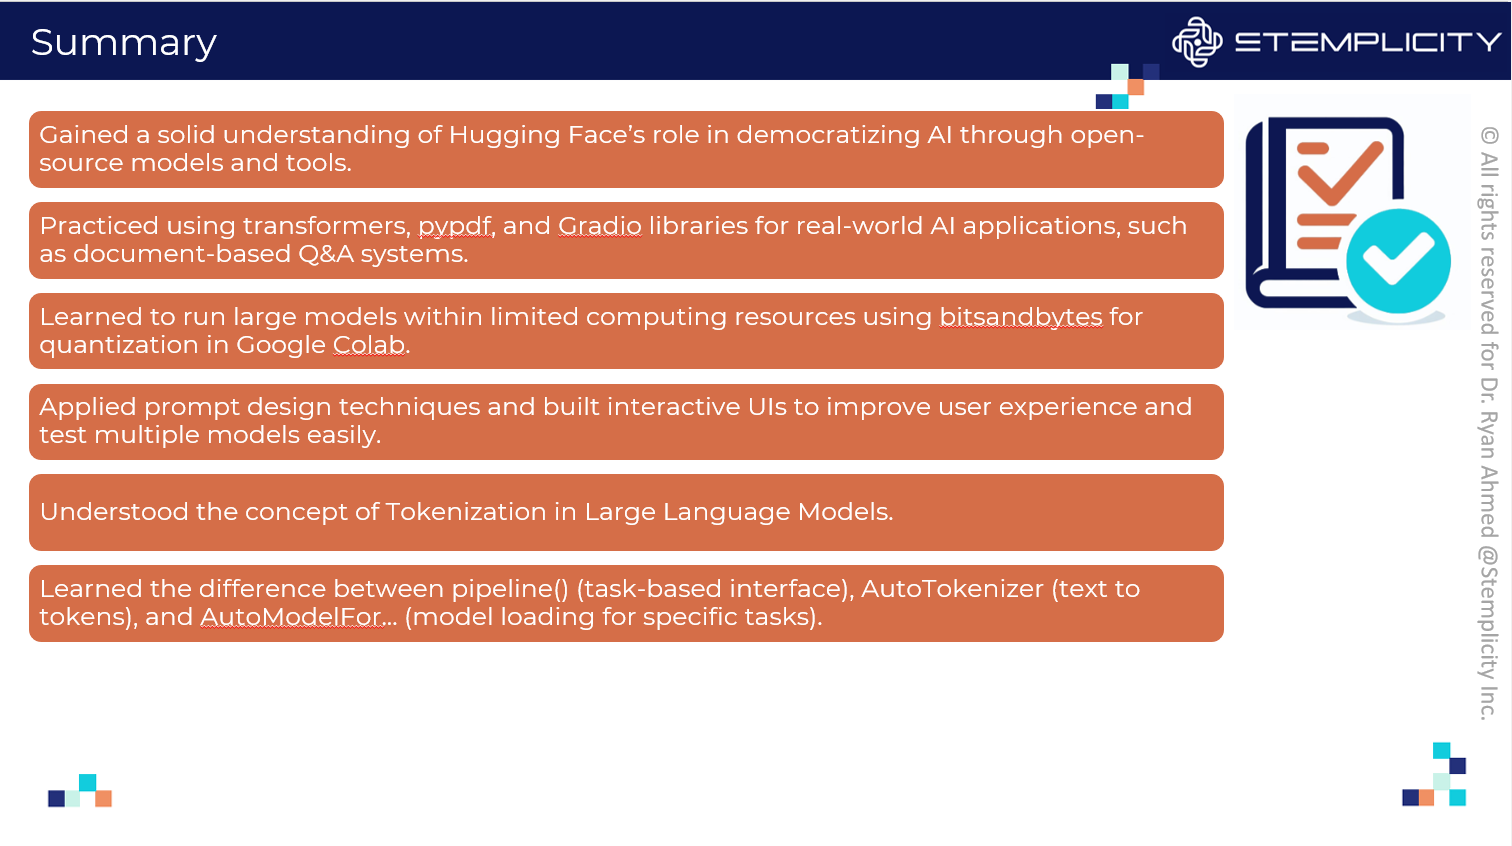

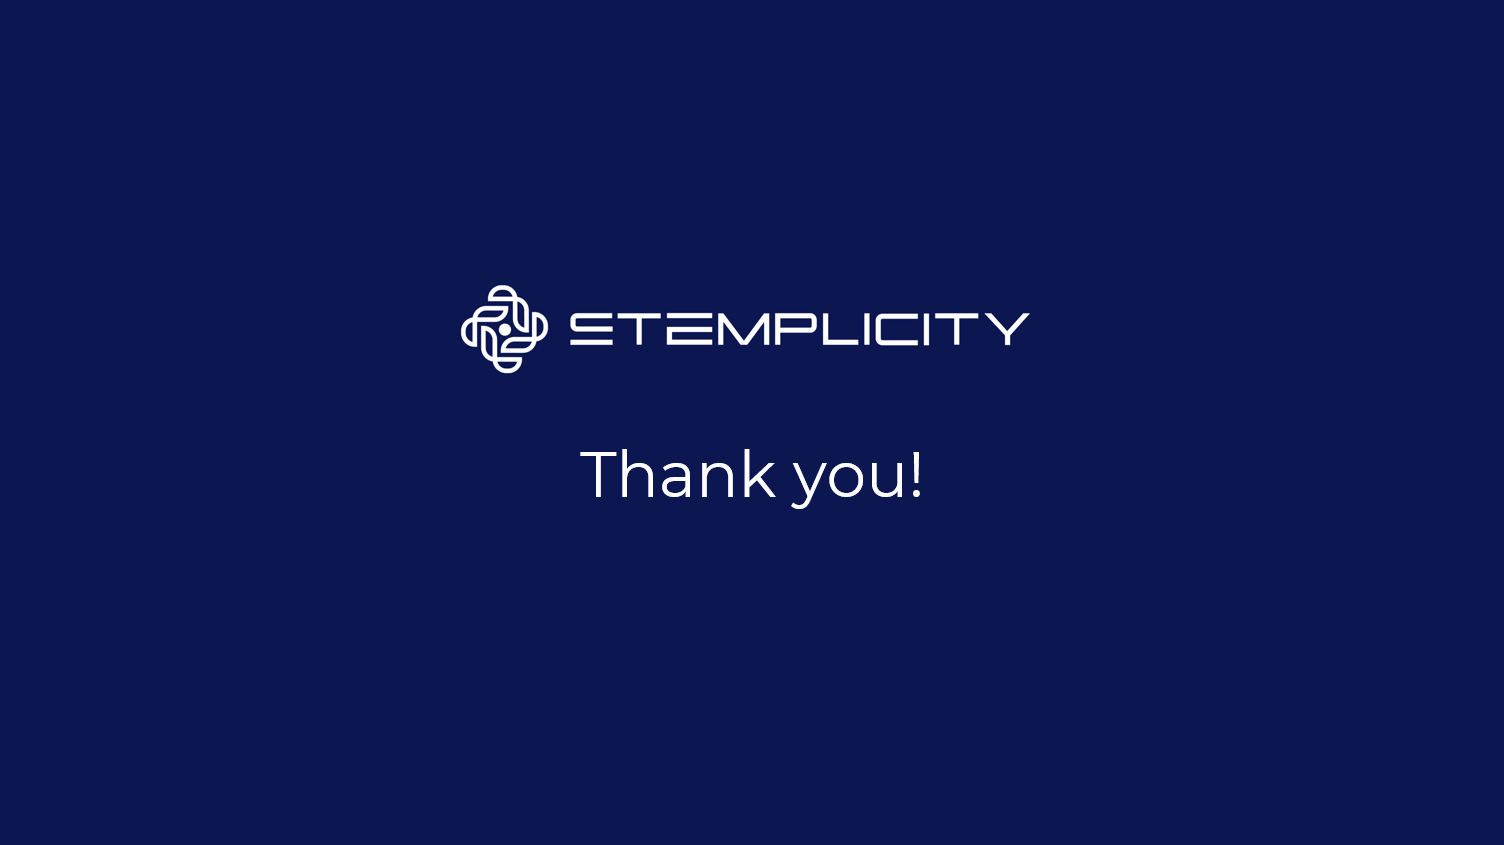